In [79]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Data load

In [50]:
budget_raw = pd.read_csv('../data/preprocessed/dotacie_ours_final.csv')
graduates_raw = pd.read_csv('../data/preprocessed/cvtisr/graduates.csv', sep=';')
teachers_degrees_raw = pd.read_csv('../data/preprocessed/cvtisr/teachers_degrees.csv', sep=';')

In [51]:
budget_raw.columns = ['year', 'uni', 'budget', 'salary_budget', 'students_budget', 'students', 'students_full_time_budget', 'dorm_cap', 'dorm_students', 'dorm_budget', 'pub_07711', 'pub_07712', 'inflation_rate', 'budget_ia']
budget_raw['other_budget'] = budget_raw['budget'] - budget_raw['students_budget'] - budget_raw['salary_budget'] - budget_raw['dorm_budget']
budget_raw.head(5)

,year,uni,budget,salary_budget,students_budget,students,students_full_time_budget,dorm_cap,dorm_students,dorm_budget,pub_07711,pub_07712,inflation_rate,budget_ia,other_budget
0,2009,UK,77024564.0,34788075,8631773,28439.0,21819.0,10969.0,9721.0,794240.0,NaN,NaN,1.0,77024560.0,32810476.0
1,2009,UPJŠ,21034251.0,9489758,2462852,8137.0,7035.0,1776.0,1775.0,128336.0,NaN,NaN,1.0,21034252.0,8953305.0
2,2009,PU,17921955.0,7287384,3728125,12399.0,7415.0,1913.0,2007.0,161600.0,NaN,NaN,1.0,17921956.0,6744846.0
3,2009,UCM,6960463.0,3211301,964838,7129.0,4742.0,224.0,222.0,14784.0,NaN,NaN,1.0,6960463.0,2769540.0
4,2009,UVL,9082561.0,4322490,601068,1454.0,1294.0,830.0,778.0,41584.0,NaN,NaN,1.0,9082561.0,4117419.0


In [36]:
graduates_raw.columns = ['uni', 'year', 'first_full_time', 'first_part_time', 'third_full_time', 'third_part_time', 'third_external_inst']
graduates_raw.head(5)

,uni,year,first_full_time,first_part_time,third_full_time,third_part_time,third_external_inst
0,AU,2009,189,0,6,1,0
1,AU,2010,199,0,7,1,0
2,AU,2011,200,0,8,3,0
3,AU,2012,196,0,12,4,0
4,AU,2013,173,0,7,8,0


In [97]:
teachers_degrees_raw.columns = ['uni', 'year', 'teacher_type', 'employment_type', 'drsc', 'phd', 'other', 'total']
teachers_degrees_raw.head(5)

,uni,year,teacher_type,employment_type,drsc,phd,other,total
0,AU,2009,asistent,full-time,0,0,10,10
1,AU,2009,asistent,part-time,0,0,3,3
2,AU,2009,docent,full-time,0,4,9,13
3,AU,2009,docent,part-time,0,1,2,3
4,AU,2009,hosťujúci profesor,full-time,0,0,0,0


## Overall budget change

In [54]:
budget_totals = (
    pd.concat(
        [
            budget_raw.groupby('year')['budget'].sum().to_frame('budget'),
            budget_raw.groupby('year')['salary_budget'].sum().to_frame('salary_budget'),
            budget_raw.groupby('year')['students_budget'].sum().to_frame('students_budget'),
            budget_raw.groupby('year')['dorm_budget'].sum().to_frame('dorm_budget'),
            budget_raw.groupby('year')['other_budget'].sum().to_frame('other_budget'),
        ], axis = 1)
        .reset_index()
)
budget_totals['salary_budget_share'] = budget_totals['salary_budget'] / budget_totals['budget']
budget_totals['students_budget_share'] = budget_totals['students_budget'] / budget_totals['budget']
budget_totals['dorm_budget_share'] = budget_totals['dorm_budget'] / budget_totals['budget']
budget_totals['other_budget_share'] = budget_totals['other_budget'] / budget_totals['budget']
budget_totals.head(5)


,year,budget,salary_budget,students_budget,dorm_budget,other_budget,salary_budget_share,students_budget_share,dorm_budget_share,other_budget_share
0,2009,3.829316e+08,172547633,50274862,3352848.0,1.482603e+08,0.450596,0.131289,0.008756,0.387172
1,2010,3.941945e+08,177193101,45552844,3326000.0,1.631544e+08,0.449507,0.115559,0.008437,0.413893
2,2011,3.925506e+08,122195435,47744810,3288800.0,2.193216e+08,0.311286,0.121627,0.008378,0.558709
3,2012,3.091253e+08,126633305,52043774,3288800.0,1.271595e+08,0.409650,0.168358,0.010639,0.411352
4,2013,4.103603e+08,126633305,53252028,3425888.0,2.270491e+08,0.308591,0.129769,0.008348,0.553292


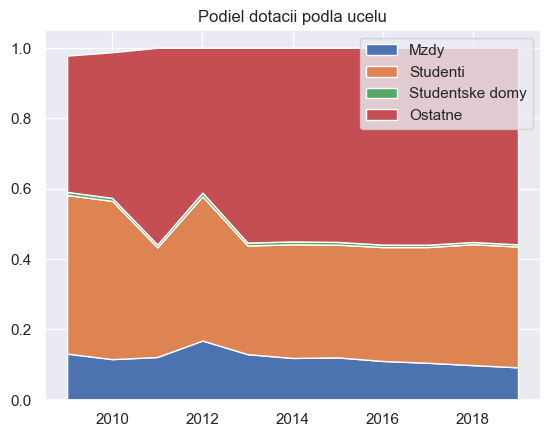

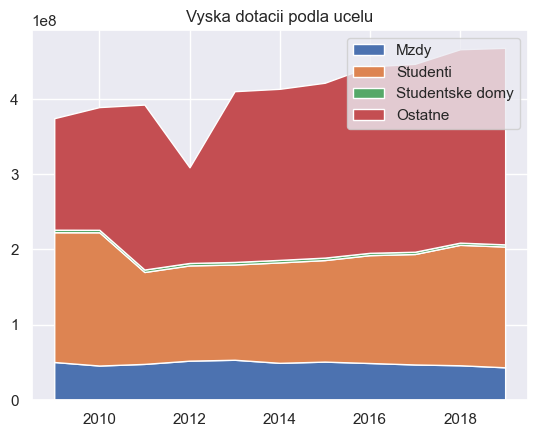

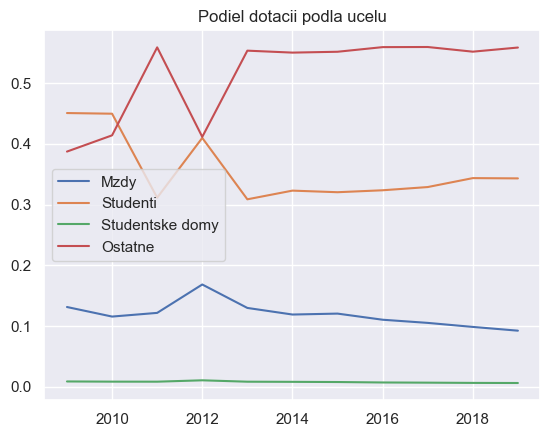

In [91]:
stacked_salary_chart_y = budget_totals[['students_budget_share', 'salary_budget_share', 'dorm_budget_share', 'other_budget_share']].values.T
stacked_salary_chart_y_abs = budget_totals[['students_budget', 'salary_budget', 'dorm_budget', 'other_budget']].values.T
# # Plot
plt.stackplot(budget_totals['year'],stacked_salary_chart_y, labels=['Mzdy', 'Studenti', 'Studentske domy', 'Ostatne'])
plt.title('Podiel dotacii podla ucelu')
plt.legend()
plt.show()

plt.stackplot(budget_totals['year'],stacked_salary_chart_y_abs, labels=['Mzdy', 'Studenti', 'Studentske domy', 'Ostatne'])
plt.title('Vyska dotacii podla ucelu')
plt.legend()
plt.show()


plt.plot(budget_totals['year'],stacked_salary_chart_y.T, label=['Mzdy', 'Studenti', 'Studentske domy', 'Ostatne'])
plt.title('Podiel dotacii podla ucelu')
plt.legend()
plt.show()

In [120]:
teachers_degrees = teachers_degrees_raw.copy()
teachers_degrees['employment_type'].value_counts()
teachers_degrees['weight'] = teachers_degrees.apply(lambda x: 1 if x.employment_type == 'full-time' else 0.5, axis = 1)
teachers_degrees['total'] *= teachers_degrees['weight']



,uni,year,assistent,docent,hostujuci_profesor,lektor,odborny_asistent,profesor
0,AU,2009,11.5,14.5,0,0.0,44.0,33.0
1,AU,2010,5.0,18.0,0,0.0,48.5,34.0
2,AU,2011,7.0,18.5,0,0.0,55.5,34.5
3,AU,2012,5.5,22.0,0,0.0,52.5,35.0
4,AU,2013,7.0,24.0,0,0.0,54.0,35.5
...,...,...,...,...,...,...,...,...
275,ŽU,2018,9.5,148.0,0,27.0,312.5,86.0
276,ŽU,2019,11.0,149.0,0,26.5,300.5,90.0
277,ŽU,2020,10.0,151.0,0,23.5,296.0,84.0
278,ŽU,2021,9.0,159.5,0,24.0,260.5,87.0


In [136]:
teachers_types = pd.pivot_table(teachers_degrees.groupby(['uni', 'year', 'teacher_type'])['total'].sum().to_frame('teachers').reset_index(), index = ['uni', 'year'], columns='teacher_type', fill_value=0).reset_index()
teachers_types.columns = ['uni', 'year', 'assistent', 'docent', 'hostujuci_profesor', 'lektor', 'odborny_asistent', 'profesor']
teachers_types = teachers_types.merge(budget_raw[['uni', 'year', 'salary_budget']], on = ['uni', 'year'], how = 'left')
teachers_types = teachers_types.dropna()

teachers_types

,uni,year,assistent,docent,hostujuci_profesor,lektor,odborny_asistent,profesor,salary_budget
0,AU,2009,11.5,14.5,0,0.0,44.0,33.0,1448749.0
1,AU,2010,5.0,18.0,0,0.0,48.5,34.0,1479444.0
2,AU,2011,7.0,18.5,0,0.0,55.5,34.5,1147907.0
3,AU,2012,5.5,22.0,0,0.0,52.5,35.0,1187816.0
4,AU,2013,7.0,24.0,0,0.0,54.0,35.5,1223047.0
...,...,...,...,...,...,...,...,...,...
272,ŽU,2015,8.0,161.0,0,25.5,336.0,95.0,9144109.0
273,ŽU,2016,12.0,150.5,0,26.0,311.0,94.0,9546045.0
274,ŽU,2017,10.0,151.0,0,28.5,313.0,90.5,10321701.0
275,ŽU,2018,9.5,148.0,0,27.0,312.5,86.0,10899800.0


In [133]:
from sklearn.linear_model import LinearRegression

In [145]:
teachers_types.query('uni == "UK"').iloc[:, 2:8]

,assistent,docent,hostujuci_profesor,lektor,odborny_asistent,profesor
168,74.0,407.5,0,58.0,1172.0,284.0
169,85.0,413.5,0,38.5,1180.5,280.5
170,86.5,426.0,0,45.0,1110.0,277.5
171,98.5,445.0,0,45.0,1125.5,278.0
172,93.0,456.5,0,47.5,1143.0,286.5
173,96.0,483.0,0,44.0,1112.0,286.5
174,102.0,482.5,0,66.0,1120.5,290.0
175,99.0,481.5,0,71.0,1152.5,296.0
176,107.5,471.5,0,74.0,1165.5,295.5
177,115.5,481.0,0,76.0,1224.5,305.5


In [195]:
subset = teachers_types.query('uni == "UK"')
subset_change = subset.iloc[:, 1:].set_index('year').pct_change().iloc[1:, :].dropna(axis = 1)

model = LinearRegression()
model.fit(
    X=subset_change.iloc[:, :-1].values,
    y=subset_change['salary_budget'].values
    )

print(model.coef_)

subset_change['predicted'] = pd.to_numeric(model.predict(subset_change.iloc[:, :-1].values), downcast='float')
subset_change['error'] = ((subset_change['predicted'] - subset_change['salary_budget']) / subset_change['salary_budget']).apply(np.abs)
subset_change


[-0.77723561  2.56894184  0.17566905  7.23104569 -7.20918626]


,assistent,docent,lektor,odborny_asistent,profesor,salary_budget,predicted,error
year,,,,,,,,
2010,0.148649,0.014724,-0.336207,0.007253,-0.012324,0.010533,0.020675,0.962853
2011,0.017647,0.030230,0.168831,-0.059720,-0.010695,-0.364007,-0.244979,0.326993
2012,0.138728,0.044601,0.000000,0.013964,0.001802,0.013810,0.110895,7.030215
2013,-0.055838,0.025843,0.055556,0.015549,0.030576,0.010929,0.027712,1.535679
2014,0.032258,0.058050,-0.073684,-0.027122,0.000000,0.083414,-0.068848,1.825381
2015,0.062500,-0.001035,0.500000,0.007644,0.012216,0.112200,0.019958,0.822119
2016,-0.029412,-0.002073,0.075758,0.028559,0.020690,0.069420,0.104355,0.503231
2017,0.085859,-0.020768,0.042254,0.011280,-0.001689,-0.006253,-0.002763,0.558239
2018,0.074419,0.020148,0.027027,0.050622,0.033841,0.115171,0.136909,0.188744
